In [3]:
import pandas as pd
data= pd.read_csv('us-counties.csv')
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [4]:
#total number of cases due to covid
data['cases'].aggregate(['sum'])

sum    136901364
Name: cases, dtype: int64

In [5]:
#total number of deaths due to covid
data['deaths'].aggregate(['sum'])

sum    7461870
Name: deaths, dtype: int64

In [ ]:

#drop fips column
data = data.drop(['fips'], axis=1) 



In [9]:
#group the data by state and find the total sum of deaths and cases occured in that state 
df = data.groupby('state').sum()
df.head()

,cases,deaths
state,,
Alabama,1382688,44178
Alaska,46739,739
Arizona,2021521,65853
Arkansas,653062,10631
California,8790629,298789


In [10]:
#state with maximum number of cases
df[df['cases']== df['cases'].max()]

,cases,deaths
state,,
New York,30099658,2269310


In [11]:
#state with minimum number of cases
df[df['cases']== df['cases'].min()]

,cases,deaths
state,,
Northern Mariana Islands,1874,180


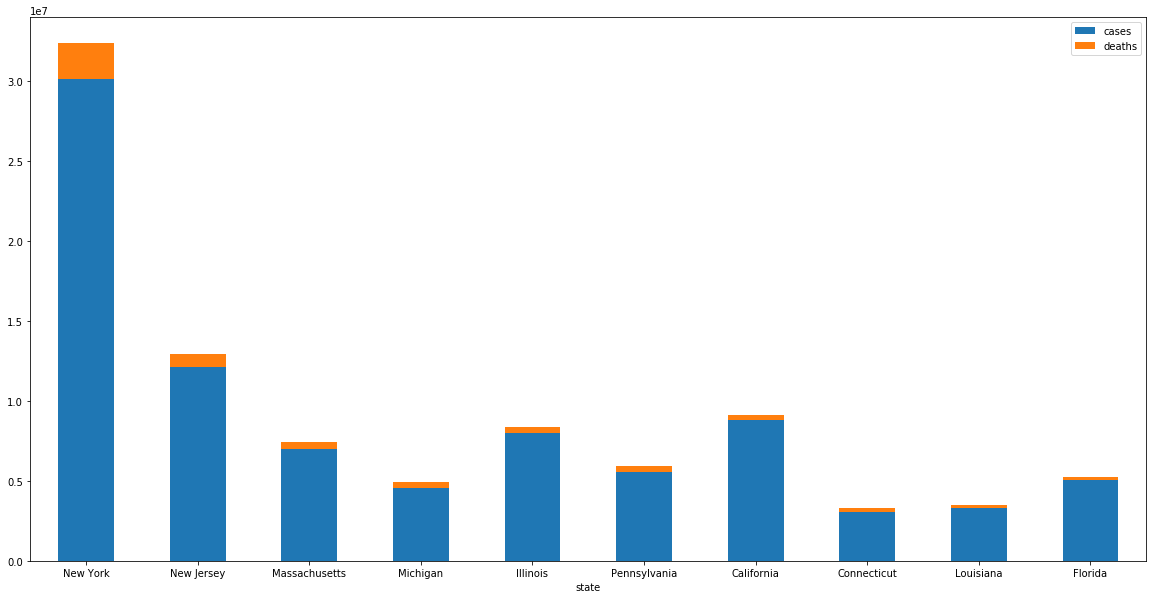

In [15]:
#plotted the graph to see the top 10 cities with maximum number of deaths
df.sort_values('deaths', ascending=False)[:10].plot.bar(stacked=True,figsize=(20,10), rot=0)

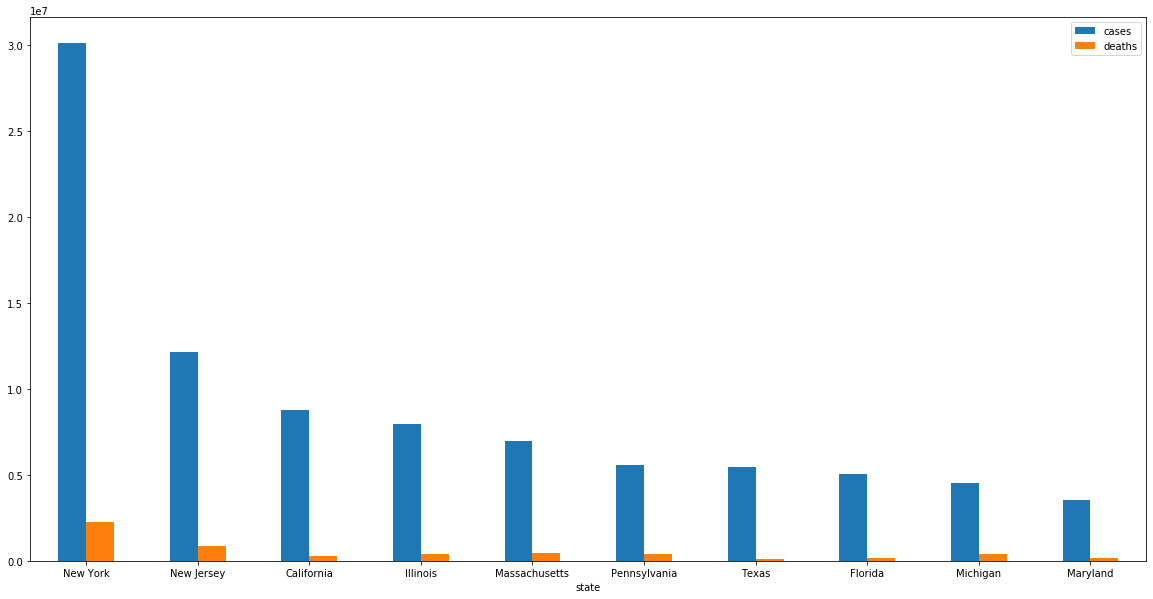

In [16]:
#plotted the graph to see the top 10 cities with maximum number of deaths
df.sort_values('cases', ascending=False)[:10].plot.bar(figsize=(20,10), rot=0)

In [17]:
#CHecking which date maximum deaths occurr

data.groupby('date').sum().sort_values('deaths', ascending=False)[:10]

,cases,deaths
date,,
2020-07-02,2758808,128825
2020-07-01,2703213,128103
2020-06-30,2653280,127461
2020-06-29,2604915,126161
2020-06-28,2565444,125815
2020-06-27,2525928,125544
2020-06-26,2483568,125033
2020-06-25,2438070,124400
2020-06-24,2396914,121934


In [18]:
#In state max death occurred  on which date 

data.groupby(['state', 'date']).sum().sort_values('deaths', ascending=False)

cases  deaths
state    date                      
New York 2020-07-02  399642   31814
         2020-07-01  398770   31791
         2020-06-30  398142   31776
         2020-06-29  397684   31143
         2020-06-28  397293   31137
...                     ...     ...
Texas    2020-02-23       4       0
         2020-02-22       4       0
         2020-02-21       4       0
         2020-02-20       2       0
Alabama  2020-03-13       6       0

[6724 rows x 2 columns]

In [60]:
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
data1 = data[data['date'] == newest_date].groupby('date').agg(sum)
data1.reset_index(inplace=True)
data1

,date,cases,deaths
0,2020-07-02,2758808,128825


In [61]:
newest_date = data['date'].max()
data2 = data[data['date'] == newest_date]

In [62]:
data3 = data2.groupby('state').agg('sum').sort_values('cases', ascending=False)
data3.reset_index(inplace=True)

In [63]:
data3[['state', 'cases']].head(5)

,state,cases
0,New York,399642
1,California,248198
2,Texas,182260
3,New Jersey,174212
4,Florida,169098


In [65]:
#Mortality Rate
mortality_rate = data1['deaths']/data1['cases']*100
mortality_rate

0    4.669589
dtype: float64

In [67]:
data3['mortality rate'] = round((data3['deaths']/data3['cases'])*100, 2)
data3[['state', 'mortality rate']].head(10)


,state,mortality rate
0,New York,7.96
1,California,2.52
2,Texas,1.41
3,New Jersey,8.67
4,Florida,2.14
5,Illinois,4.92
6,Massachusetts,7.44
7,Pennsylvania,7.29
8,Arizona,2.02
9,Georgia,3.40


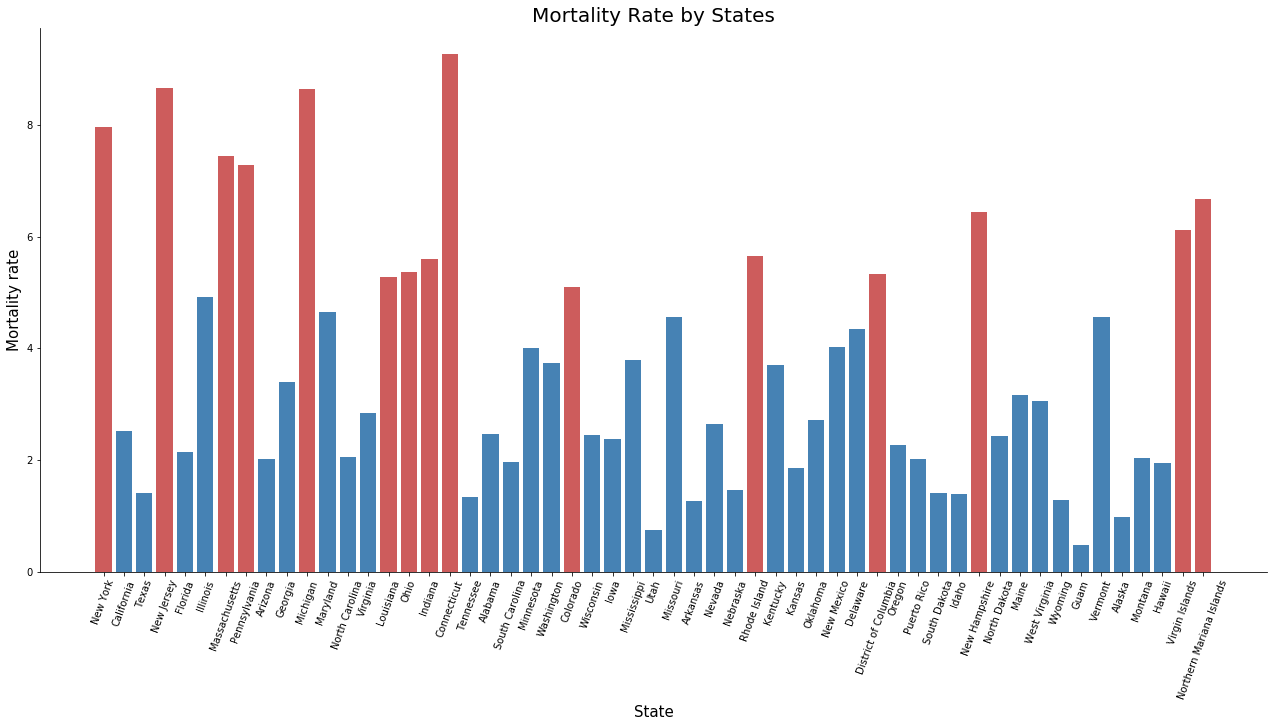

In [69]:
#Bar plot for mortality rate by states
fig, ax = plt.subplots(figsize=(22,10))
ax.tick_params(axis='x', rotation=70)
ax.bar(data3['state'], data3['mortality rate'], color=(data3['mortality rate'] < 5).map({True: 'steelblue',False: 'indianred'}))
ax.set_title('Mortality Rate by States', fontsize=20)
ax.set_ylabel('Mortality rate', fontsize=15)
ax.set_xlabel('State', fontsize=15)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
